<a href="https://colab.research.google.com/github/pjoshuar/First-Machine-Learning-Algorithm/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img,array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_train[0].shape

(28, 28)

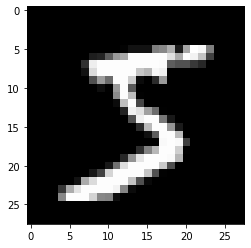

In [6]:
plt.imshow(X_train[0],cmap='gray')

In [7]:
y_train[0]

5

In [0]:
image_height,image_width = 28,28

In [9]:
X_train = X_train.reshape(60000,image_height*image_width)
X_test = X_test.reshape(10000,image_height*image_width)
X_train.shape
X_test.shape

(10000, 784)

In [10]:
X_train[0].astype('float32') / 255.
X_test[0].astype('float32') / 255.

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
y_train = to_categorical(y_train,10)
y_train.shape

(60000, 10)

In [12]:
y_test = to_categorical(y_test,10)
y_test.shape

(10000, 10)

In [0]:
model = Sequential()

In [0]:
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
784*512 + 512


401920

In [18]:
512*512 + 512

262656

In [19]:
512*10+10

5130

In [0]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 314us/step - loss: 1.5244 - accuracy: 0.9075 - val_loss: 0.2712 - val_accuracy: 0.9396
Epoch 2/20
60000/60000 [==============================] - 19s 309us/step - loss: 0.2064 - accuracy: 0.9511 - val_loss: 0.2033 - val_accuracy: 0.9471
Epoch 3/20
60000/60000 [==============================] - 19s 309us/step - loss: 0.1871 - accuracy: 0.9532 - val_loss: 0.2449 - val_accuracy: 0.9447
Epoch 4/20
60000/60000 [==============================] - 19s 310us/step - loss: 0.1705 - accuracy: 0.9558 - val_loss: 0.1621 - val_accuracy: 0.9573
Epoch 5/20
60000/60000 [==============================] - 19s 310us/step - loss: 0.1412 - accuracy: 0.9629 - val_loss: 0.1814 - val_accuracy: 0.9591
Epoch 6/20
60000/60000 [==============================] - 19s 311us/step - loss: 0.1309 - accuracy: 0.9665 - val_loss: 0.1865 - val_accuracy: 0.9586
Epoch 7/20
60000/60000 [==============================] 

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [0]:
score = model.evaluate(X_test,y_test)
print(score)